# Задание 2.

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [5]:
cd ./Downloads

[Errno 2] No such file or directory: './Downloads'
/Users/pavelkiselev/Downloads


Преподготовим данные.

In [214]:
df = pd.read_csv('orders.csv')

df.shipped_at = pd.to_datetime(df.shipped_at)
df.created_at = pd.to_datetime(df.created_at)

df

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,756927,139676,0.0,0.0,5015,0.0,37708,39,shipped,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459
1,756963,139682,0.0,0.0,7096,0.0,49435,71,shipped,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,shipped,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459
3,756985,139687,0.0,0.0,3471,0.0,9915,13,shipped,2018-08-26 18:57:01,2018-08-26 06:13:59,888422,1,226462
4,757066,119006,299.0,299.0,1254,0.0,15022,24,shipped,2018-08-26 13:46:48,2018-08-26 07:40:58,870688,1,226458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720428,5423310,1676786,258.0,258.0,4777,0.0,43286,71,shipped,2019-12-18 15:45:12,2019-12-18 09:16:28,6346125,235,973254
720429,5423488,1832586,98.0,238.0,1864,0.0,4245,13,shipped,2019-12-18 12:44:16,2019-12-18 09:20:18,7120759,235,973253
720430,5424466,1318477,158.0,238.0,2769,-200.0,4780,7,shipped,2019-12-18 13:16:08,2019-12-18 09:41:28,6881231,235,973252
720431,5426016,1116106,158.0,238.0,2876,0.0,13385,34,shipped,2019-12-18 14:28:56,2019-12-18 10:18:37,5606095,235,973254


## Customer Retention Rate  клиентов за 2018 год.

Посчитаем CRR общий по всем заказам и в разрезе городов.

In [215]:
clients_2018 = set(df[df.created_at  < '2019-01-01'].user_id.unique())
clients_2019 = set(df[df.created_at >= '2019-01-01'].user_id.unique())

crr = len(clients_2019 & clients_2018) / len(clients_2018)
crr

0.3861430295398499

In [426]:
stores = pd.read_csv('stores.csv')
stores

,id,city,retailer_id
0,1,1,1
1,2,1,1
2,3,1,1
3,8,1,1
4,9,1,1
...,...,...,...
157,1174,1,59
158,1175,1,59
159,1205,1,15
160,1300,1,15


In [427]:
df_str = pd.merge(df, stores, left_on='store_id', right_on='id')
df_str

,id_x,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id,id_y,city,retailer_id
0,756927,139676,0.0,0.0,5015,0.0,37708,39,shipped,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459,1,1,1
1,756963,139682,0.0,0.0,7096,0.0,49435,71,shipped,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460,1,1,1
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,shipped,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459,1,1,1
3,756985,139687,0.0,0.0,3471,0.0,9915,13,shipped,2018-08-26 18:57:01,2018-08-26 06:13:59,888422,1,226462,1,1,1
4,757066,119006,299.0,299.0,1254,0.0,15022,24,shipped,2018-08-26 13:46:48,2018-08-26 07:40:58,870688,1,226458,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720428,5423310,1676786,258.0,258.0,4777,0.0,43286,71,shipped,2019-12-18 15:45:12,2019-12-18 09:16:28,6346125,235,973254,235,13,15
720429,5423488,1832586,98.0,238.0,1864,0.0,4245,13,shipped,2019-12-18 12:44:16,2019-12-18 09:20:18,7120759,235,973253,235,13,15
720430,5424466,1318477,158.0,238.0,2769,-200.0,4780,7,shipped,2019-12-18 13:16:08,2019-12-18 09:41:28,6881231,235,973252,235,13,15
720431,5426016,1116106,158.0,238.0,2876,0.0,13385,34,shipped,2019-12-18 14:28:56,2019-12-18 10:18:37,5606095,235,973254,235,13,15


In [465]:
crr_city = pd.Series([])
cities = df_str.city.unique()
clients_2018_city = pd.Series([])

for city in cities:

    clients_2018 = set(df_str[df_str.created_at  < '2019-01-01'].query(f'city == {city}').user_id.unique())
    clients_2019 = set(df_str[df_str.created_at >= '2019-01-01'].query(f'city == {city}').user_id.unique())
    clients_2018_city = clients_2018_city.append(pd.Series([len(clients_2018)]))

    if clients_2018:
        crr = len(clients_2019 & clients_2018) / len(clients_2018)
        crr_city = crr_city.append(pd.Series([crr]))
    else:
        crr_city = crr_city.append(pd.Series([None]))
    
foo = pd.DataFrame({'crr': crr_city, 'clients_2018': clients_2018_city}).set_index(cities)
foo

/var/folders/_b/plz18n8x6kl7y27mc26q51jw0000gn/T/ipykernel_6035/766454559.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  crr_city = pd.Series([])
/var/folders/_b/plz18n8x6kl7y27mc26q51jw0000gn/T/ipykernel_6035/766454559.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  clients_2018_city = pd.Series([])


,crr,clients_2018
1,0.381289,34685
2,0.41595,1743
5,0.39229,882
7,0.517298,607
8,0.361905,210
10,None,0
13,None,0


In [476]:
def proportions_confint_diff_ind(city1, city2, alpha = 0.05):
    '''Считает доверительный интервал для разности долей в независимых выборках'''
    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    p1 = foo.loc[city1].crr
    p2 = foo.loc[city2].crr
    sigma = np.sqrt(p1 * (1 - p1) / foo.loc[city1].clients_2018 + p2 * (1 - p2)/ foo.loc[city2].clients_2018)
    
    left_boundary = (p1 - p2) - z * sigma
    right_boundary = (p1 - p2) + z * sigma
    
    return (left_boundary, right_boundary)

In [481]:
proportions_confint_diff_ind(1, 7, alpha = 0.05)

(-0.17608915635831016, -0.09592973619764009)

Таким образом, можно проверить, что на уровне значимости 0.05, различие в CRR для городов 7 и 1,2,5,8 является статистически значимым.

## Repeat Purchase Rates (частота повторных покупок) клиентов с отменой товаров.

Посмотрим, как количество отмен влияет на то, вернется ли к нам клиент.

In [18]:
cancellations = pd.read_csv('cancellations.csv')
cancellations

,order_id,item_id,state
0,480443,5333890,canceled
1,480443,5333777,canceled
2,480443,5334118,canceled
3,480452,5333731,canceled
4,480452,5333727,canceled
...,...,...,...
1441600,5415671,88971304,canceled
1441601,5423310,89147431,canceled
1441602,5426016,89168450,canceled
1441603,5426868,89206193,canceled


In [229]:
df_canc = pd.merge(df, cancellations.groupby('order_id').count(), how='left', left_on='id', right_on='order_id')
df_canc.state_y = df_canc.state_y.fillna(0)
df_canc

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state_x,shipped_at,created_at,ship_address_id,store_id,delivery_window_id,item_id,state_y
0,756927,139676,0.0,0.0,5015,0.0,37708,39,shipped,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459,8.0,8.0
1,756963,139682,0.0,0.0,7096,0.0,49435,71,shipped,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460,9.0,9.0
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,shipped,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459,4.0,4.0
3,756985,139687,0.0,0.0,3471,0.0,9915,13,shipped,2018-08-26 18:57:01,2018-08-26 06:13:59,888422,1,226462,1.0,1.0
4,757066,119006,299.0,299.0,1254,0.0,15022,24,shipped,2018-08-26 13:46:48,2018-08-26 07:40:58,870688,1,226458,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720428,5423310,1676786,258.0,258.0,4777,0.0,43286,71,shipped,2019-12-18 15:45:12,2019-12-18 09:16:28,6346125,235,973254,1.0,1.0
720429,5423488,1832586,98.0,238.0,1864,0.0,4245,13,shipped,2019-12-18 12:44:16,2019-12-18 09:20:18,7120759,235,973253,NaN,0.0
720430,5424466,1318477,158.0,238.0,2769,-200.0,4780,7,shipped,2019-12-18 13:16:08,2019-12-18 09:41:28,6881231,235,973252,NaN,0.0
720431,5426016,1116106,158.0,238.0,2876,0.0,13385,34,shipped,2019-12-18 14:28:56,2019-12-18 10:18:37,5606095,235,973254,1.0,1.0


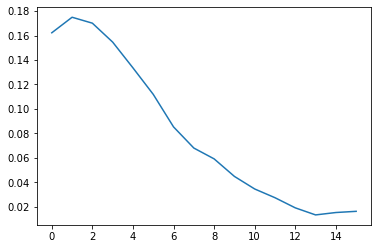

In [230]:
nums_canc = range(0, 16)
retentions_canc = []

for num_canc in nums_canc:
    retention_canc = len(df_canc.query(f'state_y == {num_canc}').groupby('user_id').count().query('id > 1')) \
                        / len(df_canc.query(f'state_y == {num_canc}'))
    retentions_canc.append(retention_canc)

plt.plot(nums_canc, retentions_canc)

Две отмены и меньше не влияют на Repeat Purchase Rate.

## Repeat Purchase Rates (частота повторных покупок) клиентов с заменой товаров.

Посмотрим, как количество замен влияет на то, вернется ли к нам клиент.

In [116]:
replacements = pd.read_csv('replacements.csv')
replacements

,order_id,item_id,state
0,480785,6466916,replaced
1,480785,6466940,replaced
2,480785,6466778,replaced
3,480785,6466825,replaced
4,480786,7261201,replaced
...,...,...,...
1250239,5426016,89177585,replaced
1250240,5426016,89169966,replaced
1250241,5426016,89163589,replaced
1250242,5426868,89272519,replaced


In [231]:
df_repl = pd.merge(df, replacements.groupby('order_id').count(), how='left', left_on='id', right_on='order_id')
df_repl.state_y = df_repl.state_y.fillna(0)
df_repl

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state_x,shipped_at,created_at,ship_address_id,store_id_x,delivery_window_id_x,item_id,state_y,delivery_window_id_y,store_id_y,starts_at,ends_at
0,756927,139676,0.0,0.0,5015,0.0,37708,39,shipped,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459,NaN,0.0,NaN,NaN,NaN,NaN
1,756963,139682,0.0,0.0,7096,0.0,49435,71,shipped,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460,NaN,0.0,NaN,NaN,NaN,NaN
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,shipped,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459,NaN,0.0,NaN,NaN,NaN,NaN
3,756985,139687,0.0,0.0,3471,0.0,9915,13,shipped,2018-08-26 18:57:01,2018-08-26 06:13:59,888422,1,226462,3.0,3.0,3.0,3.0,3.0,3.0
4,757066,119006,299.0,299.0,1254,0.0,15022,24,shipped,2018-08-26 13:46:48,2018-08-26 07:40:58,870688,1,226458,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720428,5423310,1676786,258.0,258.0,4777,0.0,43286,71,shipped,2019-12-18 15:45:12,2019-12-18 09:16:28,6346125,235,973254,4.0,4.0,4.0,4.0,4.0,4.0
720429,5423488,1832586,98.0,238.0,1864,0.0,4245,13,shipped,2019-12-18 12:44:16,2019-12-18 09:20:18,7120759,235,973253,3.0,3.0,3.0,3.0,3.0,3.0
720430,5424466,1318477,158.0,238.0,2769,-200.0,4780,7,shipped,2019-12-18 13:16:08,2019-12-18 09:41:28,6881231,235,973252,NaN,0.0,NaN,NaN,NaN,NaN
720431,5426016,1116106,158.0,238.0,2876,0.0,13385,34,shipped,2019-12-18 14:28:56,2019-12-18 10:18:37,5606095,235,973254,3.0,3.0,3.0,3.0,3.0,3.0


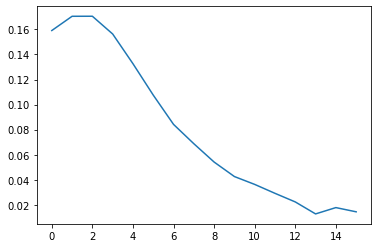

In [233]:
nums_repl = range(0, 16)
retentions_repl = []

for num_repl in nums_repl:
    retention_repl = len(df_repl.query(f'state_y == {num_repl}').groupby('user_id').count().query('id > 1')) \
                        / len(df_repl.query(f'state_y == {num_repl}'))
    retentions_repl.append(retention_repl)

plt.plot(nums_repl, retentions_repl)

Аналогично, кол-во замен до двух не влияет на Repeat Purchase Rate.

## Геоданные.

Посмотрим, как заказы распределены по районам городов.

In [238]:
df

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,756927,139676,0.0,0.0,5015,0.0,37708,39,shipped,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459
1,756963,139682,0.0,0.0,7096,0.0,49435,71,shipped,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,shipped,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459
3,756985,139687,0.0,0.0,3471,0.0,9915,13,shipped,2018-08-26 18:57:01,2018-08-26 06:13:59,888422,1,226462
4,757066,119006,299.0,299.0,1254,0.0,15022,24,shipped,2018-08-26 13:46:48,2018-08-26 07:40:58,870688,1,226458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720428,5423310,1676786,258.0,258.0,4777,0.0,43286,71,shipped,2019-12-18 15:45:12,2019-12-18 09:16:28,6346125,235,973254
720429,5423488,1832586,98.0,238.0,1864,0.0,4245,13,shipped,2019-12-18 12:44:16,2019-12-18 09:20:18,7120759,235,973253
720430,5424466,1318477,158.0,238.0,2769,-200.0,4780,7,shipped,2019-12-18 13:16:08,2019-12-18 09:41:28,6881231,235,973252
720431,5426016,1116106,158.0,238.0,2876,0.0,13385,34,shipped,2019-12-18 14:28:56,2019-12-18 10:18:37,5606095,235,973254


In [241]:
addresses = pd.read_csv('addresses.csv')
addresses

,lat,lon,id,elevator,floor
0,55.851604,37.634282,887760,NaN,13
1,55.855683,37.644165,888330,NaN,3
2,55.868020,37.671917,888379,NaN,-
3,55.858791,37.638656,888394,passenger,8
4,55.848593,37.592824,888416,NaN,-
...,...,...,...,...,...
1492298,55.027939,73.365760,7146484,NaN,-
1492299,54.936815,73.411039,7145145,NaN,-
1492300,55.007323,73.382244,7147129,NaN,4
1492301,55.023087,73.378868,6784872,NaN,6


In [244]:
df_geo = pd.merge(df, addresses[['lat', 'lon', 'id']], left_on='ship_address_id', right_on='id') \
           .drop('id_y', axis=1).rename(columns={'id_x': 'id'})
    
df_geo

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id,lat,lon
0,756927,139676,0.0,0.0,5015,0.0,37708,39,shipped,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459,55.855683,37.644165
1,756963,139682,0.0,0.0,7096,0.0,49435,71,shipped,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460,55.858791,37.638656
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,shipped,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459,55.890288,37.612822
3,756985,139687,0.0,0.0,3471,0.0,9915,13,shipped,2018-08-26 18:57:01,2018-08-26 06:13:59,888422,1,226462,55.878475,37.620050
4,757066,119006,299.0,299.0,1254,0.0,15022,24,shipped,2018-08-26 13:46:48,2018-08-26 07:40:58,870688,1,226458,55.825067,37.621798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729942,5423310,1676786,258.0,258.0,4777,0.0,43286,71,shipped,2019-12-18 15:45:12,2019-12-18 09:16:28,6346125,235,973254,55.023707,73.428803
729943,5423488,1832586,98.0,238.0,1864,0.0,4245,13,shipped,2019-12-18 12:44:16,2019-12-18 09:20:18,7120759,235,973253,54.885839,73.300227
729944,5424466,1318477,158.0,238.0,2769,-200.0,4780,7,shipped,2019-12-18 13:16:08,2019-12-18 09:41:28,6881231,235,973252,54.974421,73.447893
729945,5426016,1116106,158.0,238.0,2876,0.0,13385,34,shipped,2019-12-18 14:28:56,2019-12-18 10:18:37,5606095,235,973254,54.999867,73.308565


In [247]:
df_geo_to_csv = df_geo[['lat', 'lon']]
df_geo_to_csv

,lat,lon
0,55.855683,37.644165
1,55.858791,37.638656
2,55.890288,37.612822
3,55.878475,37.620050
4,55.825067,37.621798
...,...,...
729942,55.023707,73.428803
729943,54.885839,73.300227
729944,54.974421,73.447893
729945,54.999867,73.308565


In [251]:
df_geo[['lat', 'lon']].to_csv(path_or_buf='./orders_geo.csv')

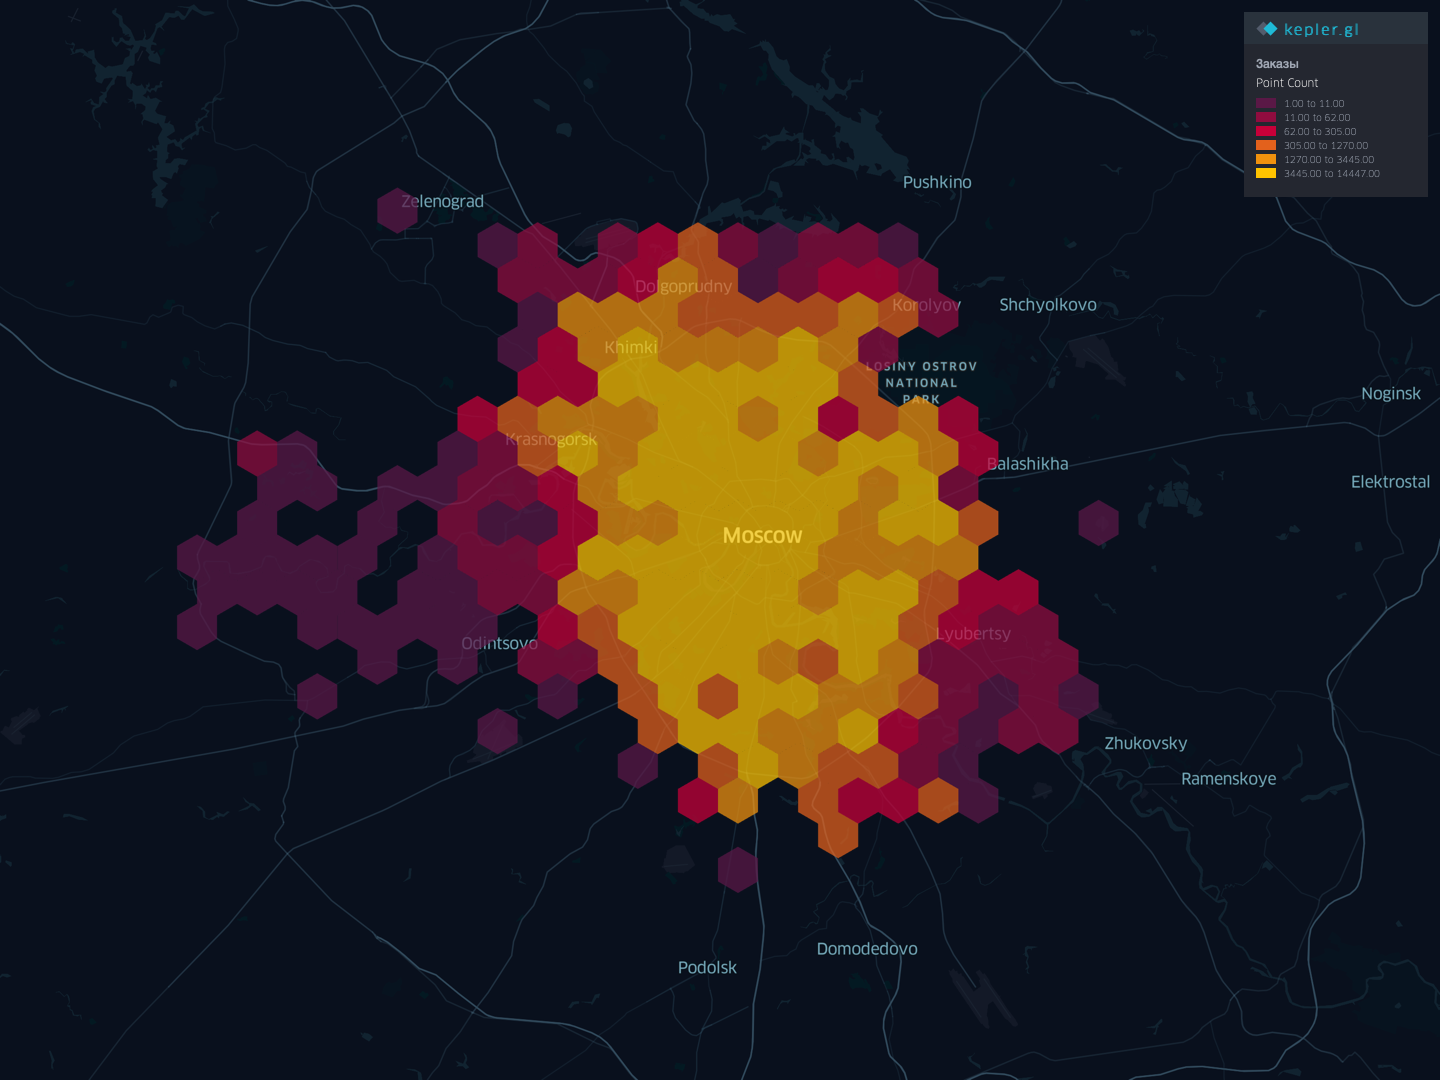

In [252]:
from IPython.display import Image
Image(filename='msc.png')

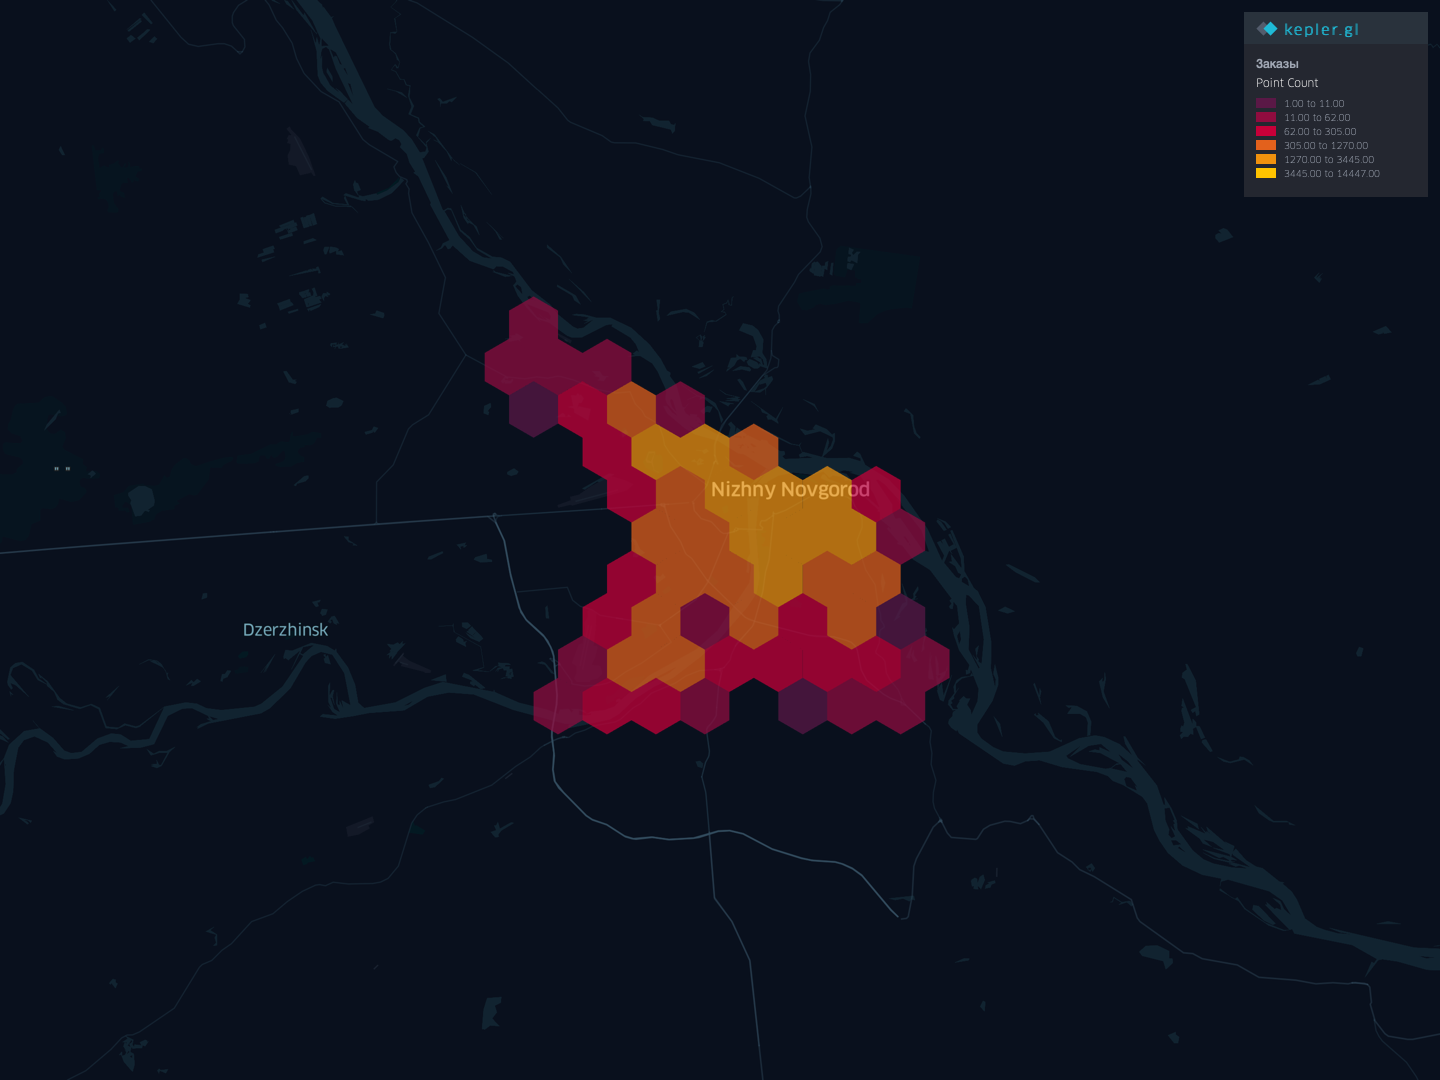

In [253]:
Image(filename='nn.png')

Ячейки можно сравнивать между собой и с картой плотности, также хорошо бы посмотреть конверсии по этапам воронки продаж. Тогда можно будет искать точки роста.

## Периодичность покупок.

Проанализируем как распределена периодичность покупок. Глупо рассылать промоакции на следующий день после покупки клиентом, но также не хотелось бы рассылать их слишком поздно, когда клиент может уже оформить заказ у конкурентов.

In [271]:
df

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,756927,139676,0.0,0.0,5015,0.0,37708,39,shipped,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459
1,756963,139682,0.0,0.0,7096,0.0,49435,71,shipped,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,shipped,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459
3,756985,139687,0.0,0.0,3471,0.0,9915,13,shipped,2018-08-26 18:57:01,2018-08-26 06:13:59,888422,1,226462
4,757066,119006,299.0,299.0,1254,0.0,15022,24,shipped,2018-08-26 13:46:48,2018-08-26 07:40:58,870688,1,226458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720428,5423310,1676786,258.0,258.0,4777,0.0,43286,71,shipped,2019-12-18 15:45:12,2019-12-18 09:16:28,6346125,235,973254
720429,5423488,1832586,98.0,238.0,1864,0.0,4245,13,shipped,2019-12-18 12:44:16,2019-12-18 09:20:18,7120759,235,973253
720430,5424466,1318477,158.0,238.0,2769,-200.0,4780,7,shipped,2019-12-18 13:16:08,2019-12-18 09:41:28,6881231,235,973252
720431,5426016,1116106,158.0,238.0,2876,0.0,13385,34,shipped,2019-12-18 14:28:56,2019-12-18 10:18:37,5606095,235,973254


In [277]:
users = df.groupby('user_id').count().query('id > 1')
users

,id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
user_id,,,,,,,,,,,,,
31,41,41,41,41,41,41,41,41,41,41,41,41,41
45,31,31,31,31,31,31,31,31,31,31,31,31,31
167,37,37,37,37,37,37,37,37,37,37,37,37,37
203,3,3,3,3,3,3,3,3,3,3,3,3,3
333,13,13,13,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831309,2,2,2,2,2,2,2,2,2,2,2,2,2
1832556,2,2,2,2,2,2,2,2,2,2,2,2,2
1833088,2,2,2,2,2,2,2,2,2,2,2,2,2


In [292]:
df_per = pd.merge(df, users[['id']], left_on='user_id', right_on='user_id') \
           .rename(columns={'id_x': 'id', 'id_y': 'num_orders'})

df_per = df_per.sort_values(by=['user_id', 'created_at'])
df_per

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id,num_orders
15985,775079,31,448.0,448.0,8689,0.0,63040,58,shipped,2018-09-06 19:26:52,2018-09-04 19:25:37,885601,12,235872,41
15986,778072,31,249.0,249.0,10900,0.0,30739,60,shipped,2018-09-13 18:51:06,2018-09-06 15:00:08,921910,12,241678,41
15987,807789,31,447.0,447.0,9265,0.0,24962,62,shipped,2018-09-21 19:55:56,2018-09-21 13:52:06,946248,12,248345,41
15988,810901,31,199.0,199.0,12130,0.0,6335,22,shipped,2018-09-23 11:05:58,2018-09-23 08:28:03,979405,12,250004,41
15989,811200,31,794.0,794.0,12186,0.0,82218,89,shipped,2018-10-06 18:34:49,2018-09-23 10:56:07,984870,12,260845,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213236,5426825,1833088,0.0,0.0,1103,0.0,1000,4,shipped,2019-12-18 16:08:41,2019-12-18 10:35:57,7122870,10,969774,2
368171,4710687,1833120,98.0,249.0,3075,-300.0,14351,28,shipped,2019-12-18 20:28:09,2019-11-30 23:18:20,6222801,68,970548,2
368172,4850337,1833120,98.0,249.0,3825,0.0,6325,6,shipped,2019-12-18 15:03:37,2019-12-04 13:41:20,6222801,184,972343,2
497735,5422628,1834274,98.0,238.0,3425,0.0,17470,40,shipped,2019-12-18 16:56:49,2019-12-18 09:01:04,7119549,257,973200,2


In [414]:
res = pd.Series([])

for user in users.index:
    user_orders = df_per.query(f'user_id == {user}')
    
    a = user_orders.created_at[1:].reset_index(drop=True)
    b = user_orders.created_at[:-1].reset_index(drop=True)
    
    user_periods = a - b
    
    res = res.append(user_periods)

res

/var/folders/_b/plz18n8x6kl7y27mc26q51jw0000gn/T/ipykernel_6035/1361098628.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series([])


0    1 days 19:34:31
1   14 days 22:51:58
2    1 days 18:35:57
3    0 days 02:28:04
4   24 days 09:24:48
          ...       
0    0 days 00:39:19
0    0 days 03:34:09
0    0 days 00:26:32
0    3 days 14:23:00
0    0 days 00:08:49
Length: 462606, dtype: timedelta64[ns]

In [415]:
res.mean()

Timedelta('23 days 11:36:15.755640869')

In [416]:
res.std()

Timedelta('42 days 10:07:18.272853038')

Среднее значение равно 23 дням со стандартным отклонением 42 дня. Посмотрим, можно ли угадать распределение этой случайной величины. Предварительно округлим значения до дней и переведем в float.

In [417]:
res = res.dt.round('1d').apply(lambda x: float(x.days))
res = res.clip(0, np.percentile(res, 99))
res

0     2.0
1    15.0
2     2.0
3     0.0
4    24.0
     ... 
0     0.0
0     0.0
0     0.0
0     4.0
0     0.0
Length: 462606, dtype: float64

Оценим парметр $\lambda$ экспоненциального распределения.

In [418]:
lambda_ = 1 / res.mean()
lambda_

0.044014902457257525

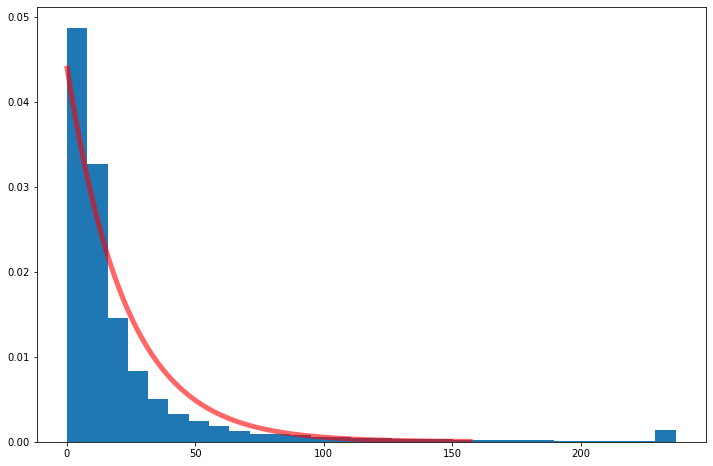

In [425]:
plt.figure(figsize=(12,8))

x = np.linspace(expon.ppf(0.001, scale = 1 / lambda_), expon.ppf(0.999, scale = 1 / lambda_), 100)

plt.plot(x, expon.pdf(x, scale = 1 / lambda_), 'r-', lw=5, alpha=0.6, label='expon pdf')
plt.hist(res, bins=30, density=True);

Можно предположить, что период от покупки до покупки можно моделировать как экспоненциальную случайную величину с оценкой параметра $\lambda$ как $1/E(T)$. Конечно, нужно еще применить статистические критерии для проверки и определить, как лучше учитывать клиентов с одной покупкой. :)